## Курсовая работа по дисциплине "Численные Методы"
### Вычисление многократных интегралов с использованием метода Монте-Карло.
Сорокин Никита, М8О-403Б-20

In [89]:
import time
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Random number generator

a. Multiplicative linear congruental generator

$$
s_i = (a \, s_{i - 1} + c) \,\, mod \,\, m
$$

In [90]:
N = 10000
s = np.zeros(N)

In [91]:
def MLCG(left=0, right=1, N=1):
    a = 69069
    c = 0
    m = 2**32

    s = np.zeros(N)
    s[0] = int((time.time() % 1) * 10**16) % m

    for i in range(1, N):
        s[i] = (a * s[i - 1] + c) % m

    s /= m

    s = left + (right - left) * s

    return s

(array([ 945.,  985., 1057., 1000., 1050.,  996.,  921., 1064., 1010.,
         972.]),
 array([-1.99934025, -1.69945183, -1.3995634 , -1.09967497, -0.79978654,
        -0.49989811, -0.20000968,  0.09987875,  0.39976718,  0.69965561,
         0.99954404]),
 <BarContainer object of 10 artists>)

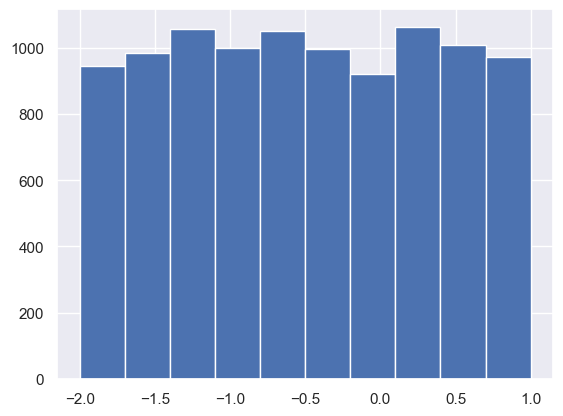

In [92]:
plt.hist(MLCG(-2, 1, 10000))

### Интегрирование методом Монте-Карло

$$ I = \int_G f(x)dx, $$

Тогда,

$$ \hat{I} = V \cdot \overline{F_n} \cdot \hat{\Omega} = \frac{V}{N} \sum_{i=1}^{n} F(\overline{\xi_i}) $$

$$ \Delta I = \frac{V \cdot t_\beta \cdot (S_1 \sqrt{\hat{\omega}} + | \overline{F_n}| S_2)}{\sqrt{N}}$$


In [72]:
def MonteCarlo(f, cube, G, N, t_beta, large_numbers=False):

    V = np.prod(cube[:, 1] - cube[:, 0])

    if large_numbers == False:
        V = np.prod(cube[:, 1] - cube[:, 0])

    if large_numbers == True:
        V = int(1)
        for i in range(cube.shape[0]):
            V *= int(cube[i, 1] - cube[i, 0])

    xi = np.zeros((N, cube.shape[0]))
    for i in range(cube.shape[0]):
        #xi[:, i] = MLCG(0, 1, N)
        xi[:, i] = np.random.random(N)

    x = np.zeros((N, cube.shape[0]))
    x = cube[:, 0] + (cube[:, 1] - cube[:, 0]) * xi

    n = 0
    F = np.zeros(N)
    F2 = np.zeros(N)
    for i in range(N):
        if G(x[i, :]) == 1:
            n += 1
            F[i] = f(x[i, :])
            F2[i] = f(x[i, :])**2

    omega_hat = n / N
    F_mean = np.sum(F) / n

    I_hat = V * F_mean * omega_hat

    S1 = np.sum(F2) / n - F_mean**2
    S2 = omega_hat * (1 - omega_hat)

    c = V * t_beta * (S1 * omega_hat**(0.5) + abs(F_mean) * S2)
    I_del = c / (N**(0.5))

    return I_hat, I_del, c

### Пример 1: Вычисление числа $ \pi $ (сравнение формул для гиперсфер)

Рассмотрим функцию:

$$ f(x, y) = 1, \quad G = \{(x, y): x^2 + y^2 <= 1 \}$$

А также множество:

$$ G ⊂ G' = [-1, 1] \times [-1, 1] \, , \quad V(G') = 4 $$

Ясно, что:

$$ I_\pi = \int_{G} f(x, y) dxdy = \pi $$

Пользуясь методом Монте Карло имеем:

$$ Q_N = 4 \frac{1}{N} \sum_{i=1}^{n} f(x_i, y_i) \rightarrow I_\pi $$

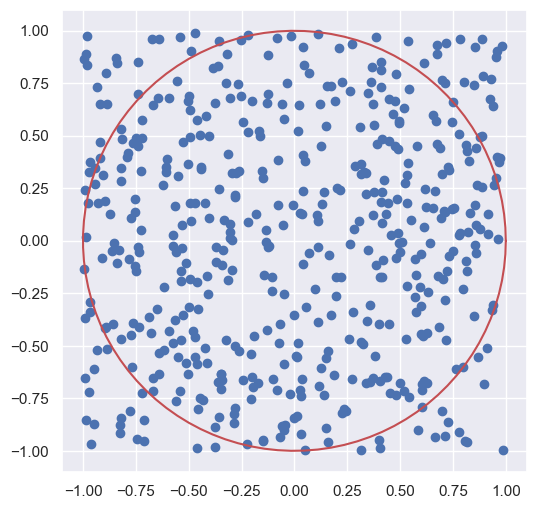

In [73]:
omega = np.array([[-1, 1], [-1, 1]])
N = 500

fig, axs = plt.subplots(figsize=(6, 6))

points = np.array([np.random.uniform(omega[:, 0], omega[:, 1]) for i in range(N)])
axs.scatter(points[:, 0], points[:, 1])

t = np.linspace(0, 2 * np.pi, 100)
axs.plot(np.cos(t), np.sin(t), c='r')

In [74]:
def f(x):
    return 1

cube = np.array([[-1, 1], [-1, 1]])

def G(x):
    return 1 if x[0]**2 + x[1]**2 <= 1 else 0

t_beta=3

In [76]:
N = 1000000
I_hat, I_del, c = MonteCarlo(f=f, cube=cube, G=G, N=N, t_beta=t_beta)
I_hat, I_del

(3.141572, 0.002022610026612)

### Пример 2: Интеграл от функции, не имеющей первообразной в классе элементарных функций

$$ \Phi(t) = \frac{1}{\sqrt{2 \pi}} \int_0^t e^{-\frac{z}{2}}dz $$

По таблице Лапласа:

$ \Phi(3) = 0.49865 $ 

In [ ]:
def f(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

cube = np.array([[0, 3]])

def G(x):
    return 1

t_beta=3

Монте Карло:

In [79]:
N = 1000000
I_hat, I_del, c = MonteCarlo(f=f, cube=cube, G=G, N=N, t_beta=t_beta)
I_hat, I_del

C:\Users\никита\AppData\Local\Temp\ipykernel_5748\2720741997.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F[i] = f(x[i, :])
C:\Users\никита\AppData\Local\Temp\ipykernel_5748\2720741997.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F2[i] = f(x[i, :])**2


(0.49861380415976214, 0.00017443981124996936)

### Пример 3: Двойной интеграл

Вычислим методом Монте-Карло интеграл

$$ I = \int_0^2 dx \int_{x^2}^{2x} (x+y) dy $$

Нетрудно показать аналитически, что

$$ I = \frac{52}{15} = 3.4(6) $$

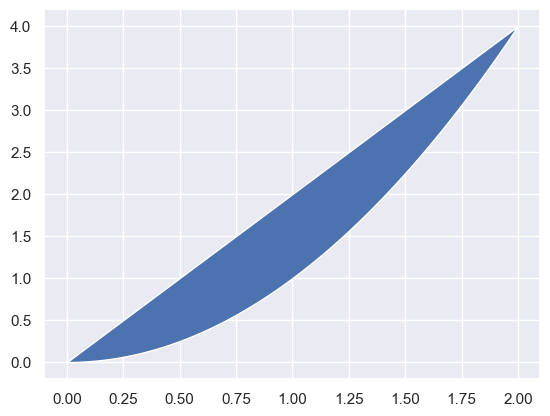

In [18]:
x = np.linspace(0, 2, 100)

y1 = lambda x: x**2
y2 = lambda x: 2 * x

plt.fill_between(x, y1(x), y2(x))

In [81]:
def f(x):
    return x[0] + x[1]

cube = np.array([[0, 2], [0, 4]])

def G(x):
    return 1 if (x[1] <= 2 * x[0]) and (x[1] >= x[0]**2) else 0

t_beta=3

In [86]:
N = 10000000
I_hat, I_del, c = MonteCarlo(f=f, cube=cube, G=G, N=N, t_beta=t_beta)
I_hat, I_del

(3.469136008805349, 0.008538222361741227)

### Пример 4: Тройной интеграл. Объем восьмой части шара

Дан шар с центром в начале координат и радиусом R = 2. Вычислить методом Монте-Карло объем части шара, расположенной в первом октанте, т.е. вычислим тройной интеграл

$$ V = \int \int \int_G dx \, dy \, dz, $$

где $ G = \{(x, y, z): x^2 + y^2 + z^2 \leq 4, \, x \geq 0, \, y \geq 0, \, z \geq 0 \} $

Аналитическое значение равно:

$$ V = \frac{1}{8} \cdot \frac{4 \pi R^3}{3} = 4.18879020... $$

In [95]:
def f(x):
    return 1

cube = np.array([[-2, 2], [-2, 2], [-2, 2]])

def G(x):
    return 1 if (x[0]**2 + x[1]**2 + x[2]**2 <= 4) and (x[0] >= 0) and (x[1] >= 0) and (x[2] >= 0) else 0

t_beta=3

In [96]:
N = 1000000
I_hat, I_del, c = MonteCarlo(f=f, cube=cube, G=G, N=N, t_beta=t_beta)
I_hat, I_del

(4.193216, 0.011755442042687999)

### Пример 5: Шестикратные интегралы в задаче о взаимном притяжение двух материальных тел

$$ F_x = G \int \int \int \, \int \int \int_{D \times D'} \frac{\rho(x,y,z) \rho'(x',y',z')}{r^3} \, (x-x') \, dx \, dy \, dz \, dx' dy' dz' $$

$$ F = \sqrt{F_x^{2} + F_y^{2} + F_z^{2}} $$

In [97]:
G_const = 6.67 * 1e-11

m_earth = 6 * 10**24
m_moon = 7.35 * 10**22

r_const = 384467000

rho_earth = 5520
rho_moon = 3346

R_earth = 6367000
R_moon = 1737000

def r(x):
    return np.sqrt((x[0] - x[3])**2 + (x[1] - x[4])**2 + (x[2] - x[5])**2)

def fx(x):
    return G_const * rho_earth * rho_moon * (x[0] - x[3]) / r(x)**3

def fy(x):
    return G_const * rho_earth * rho_moon * (x[1] - x[4]) / r(x)**3

def fz(x):
    return G_const * rho_earth * rho_moon * (x[2] - x[5]) / r(x)**3

def f(fx, fy, fz):
    return np.sqrt(fx**2 + fy**2 + fz**2)

cube = np.array([[-R_earth, R_earth], [-R_earth, R_earth], [-R_earth, R_earth],
                 [r_const - R_moon, r_const + R_moon], [-R_moon, R_moon], [-R_moon, R_moon]])

def G(x):
    return 1 if ((x[0]**2 + x[1]**2 + x[2]**2 <= R_earth**2) and
                 ((x[3] - r_const)**2 + x[4]**2 + x[5]**2 <= R_moon**2)) else 0

t_beta=3

In [98]:
N = 1000000
Fx, Fx_del, c = MonteCarlo(f=fx, cube=cube, G=G, N=N, t_beta=t_beta, large_numbers=True)
Fy, Fy_del, c = MonteCarlo(f=fy, cube=cube, G=G, N=N, t_beta=t_beta, large_numbers=True)
Fz, Fz_del, c = MonteCarlo(f=fz, cube=cube, G=G, N=N, t_beta=t_beta, large_numbers=True)

In [69]:
f(Fx, Fy, Fz)

1.9820578854942717e+20

In [70]:
f(Fx_del, Fy_del, Fz_del)

4.312700291312388e+17

Аналитически (но не точно):

In [71]:
F = G_const * m_earth * m_moon / r_const**2
F

1.989968883800508e+20